## Age Analysis of Members of the 113th Congress of the United States

### Introduction

This project uses the Python Polars package to analyze data of U.S. Congressional Members. Functions are created to read in this data as a Polars DataFrame, calculate the mean, median, and standard deviation of age, and to plot the distribution of age by Congress. 

Data was accessed from the following GitHub repository: https://github.com/fivethirtyeight/data/blob/master/congress-age/congress-terms.csv

### Descriptive Statistics

In [9]:
# import packages
import polars as pl
import matplotlib.pyplot as plt
import os

In [10]:
# Define Function to Read in Data from Github URL


def read_congressdata(url):
    return pl.read_csv(url, has_header=True, truncate_ragged_lines=True)


# Load Data
url = "https://github.com/fivethirtyeight/data/blob/master/congress-age/congress-terms.csv?raw=true"
df = read_congressdata(url)
df.head()

congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
i64,str,str,str,str,str,str,str,str,str,str,str,f64
80,"""house""","""M000112""","""Joseph""","""Jefferson""","""Mansfield""",null,"""1861-02-09""","""TX""","""D""","""Yes""","""1947-01-03""",85.9
80,"""house""","""D000448""","""Robert""","""Lee""","""Doughton""",null,"""1863-11-07""","""NC""","""D""","""Yes""","""1947-01-03""",83.2
80,"""house""","""S000001""","""Adolph""","""Joachim""","""Sabath""",null,"""1866-04-04""","""IL""","""D""","""Yes""","""1947-01-03""",80.7
80,"""house""","""E000023""","""Charles""","""Aubrey""","""Eaton""",null,"""1868-03-29""","""NJ""","""R""","""Yes""","""1947-01-03""",78.8
80,"""house""","""L000296""","""William""",null,"""Lewis""",null,"""1868-09-22""","""KY""","""R""","""No""","""1947-01-03""",78.3


In [7]:
# Define Functions to Calculate Mean, Median, and Standard Deviation of Age
def mean_age(df):
    # calculate mean of column with "age" in it
    age_column = [col for col in df.columns if "age" in col]
    if age_column:
        # Assuming there's onlmeany one age column in NC voter file data
        column_name = age_column[0]
        # Calculate the mean of the identified column
        result = df[column_name].mean()
        return result
    else:
        result = print("No column containing 'age' found.")
    return result


def median_age(df):
    # calculate median of column with "age" in it
    age_column = [col for col in df.columns if "age" in col]
    if age_column:
        # Assuming there's only one age column in NC voter file data
        column_name = age_column[0]
        # Calculate the mean of the identified column
        result = df[column_name].median()
        return result
    else:
        result = print("No column containing 'age' found.")
    return result


def std_age(df):
    # calculate standard deviation of column with "age" in it
    age_column = [col for col in df.columns if "age" in col]
    if age_column:
        # Assuming there's only one age column in NC voter file data
        column_name = age_column[0]
        # Calculate the mean of the identified column
        result = df[column_name].std()
        return result
    else:
        result = print("No column containing 'age' found.")
    return result


# Calculate Mean, Median, and Standard Deviation
summary = {
    "Statistic": [
        "Mean Age",
        "Median Age",
        "Standard Deviation of Age",
        "Count of Congressional Members",
    ],
    "Value (Rounded)": [
        round(mean_age(df), 2),
        round(median_age(df), 2),
        round(std_age(df), 2),
        round(len(df), 2),
    ],
}
# Create DataFrame
summarydf = pl.DataFrame(summary)
print(summarydf)

shape: (4, 2)
┌────────────────────────────────┬─────────────────┐
│ Statistic                      ┆ Value (Rounded) │
│ ---                            ┆ ---             │
│ str                            ┆ f64             │
╞════════════════════════════════╪═════════════════╡
│ Mean Age                       ┆ 53.31           │
│ Median Age                     ┆ 53.0            │
│ Standard Deviation of Age      ┆ 10.68           │
│ Count of Congressional Members ┆ 18635.0         │
└────────────────────────────────┴─────────────────┘


### Data Visualization

To visualize the distribution of age among U.S. Congressional members for a specific Congress, we use a histogram created with the matplotlib Python package. 

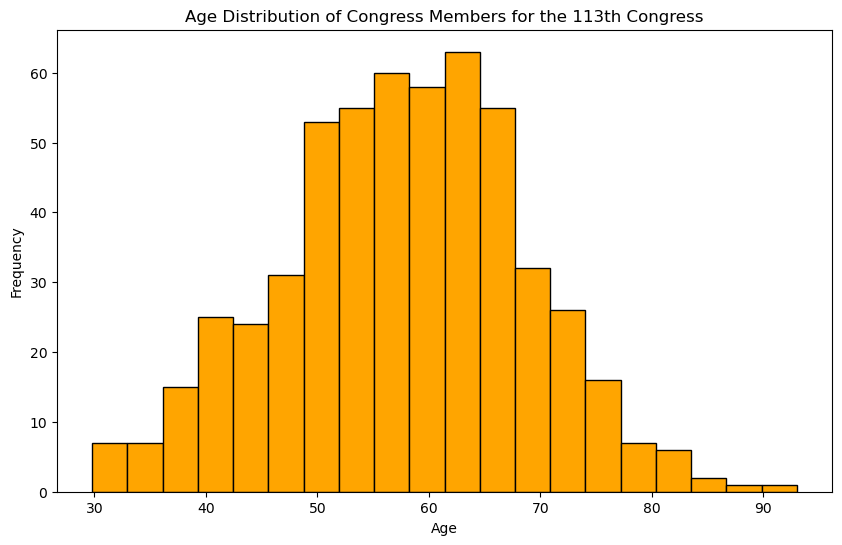

In [8]:
def generate_hist_member_age_bycongress(df, congress, plot_name):
    # create a histogram of ages for Congressional Members
    # as filtered for a specific Congress
    congress_df = df.filter(pl.col("congress") == congress)
    plt.figure(figsize=(10, 6))
    plt.hist(congress_df["age"], bins=20, color="orange", edgecolor="black")
    plt.title(f"Age Distribution of Congress Members for the {congress:.0f}th Congress")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    subfolder = "Output Images"
    file_path = os.path.join(subfolder, plot_name)
    plt.savefig(file_path)
    plt.show()


generate_hist_member_age_bycongress(df, 113, "113th_congress")

### Conclusion

In this project, we used the Python Polars package to calculate summary statistics and create a simple histogram. 
Further analysis of U.S Congressional members by demographic characteristics and socioeconomic background may help us better understand the barriers to elected office that some communities may face.


